### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [107]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [108]:
train_original = train.copy()
test_original = test.copy()

### Understanding the Data

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Univariate Analysis

### Target Variable

In [8]:
#train["Loan_Status"].size
train["Loan_Status"].count()

614

In [9]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

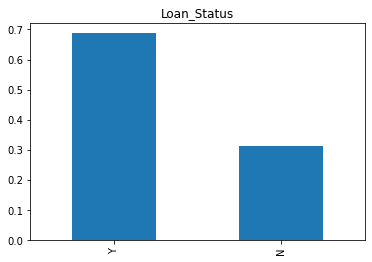

In [11]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

### Independent Variable (Categorical)

In [12]:
train["Gender"].count()

601

In [13]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Among 601 person: 
Male : 489 
Female : 112

In [14]:
train['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

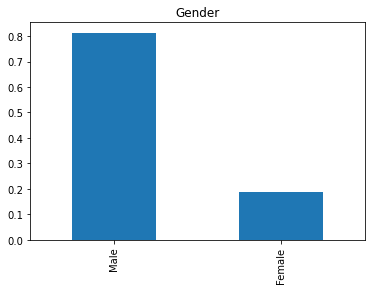

In [15]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our train dataset the "Gender" variable contain
Male : 81%
Female: 19%     

In [16]:
train["Married"].count()

611

In [17]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
train['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

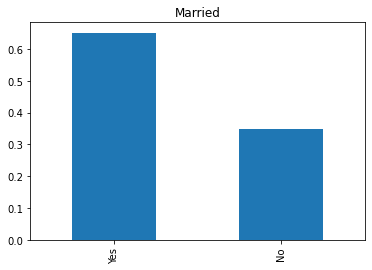

In [19]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%    

In [20]:
train["Self_Employed"].count()

582

In [21]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
train['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

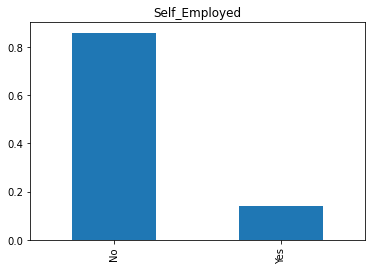

In [23]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

In [24]:
train["Credit_History"].count()

564

In [25]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
train['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

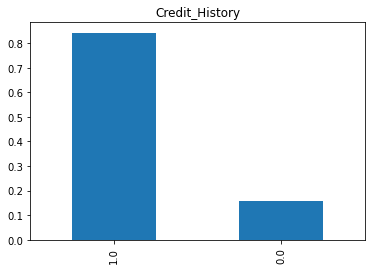

In [27]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


Around 84% applicants have repaid their debts.

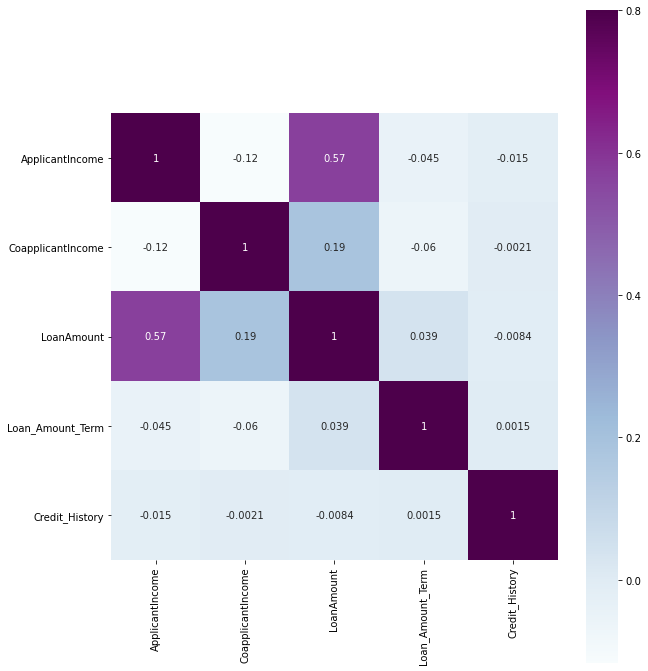

In [30]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

### Missing Value and Outlier Treatment

In [33]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

In [34]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [35]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [37]:
train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [41]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [42]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

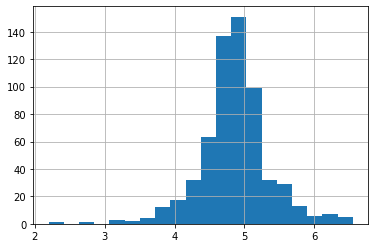

In [44]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

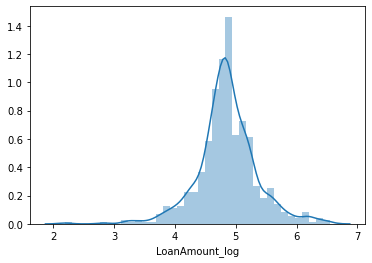

In [45]:
sns.distplot(train["LoanAmount_log"])

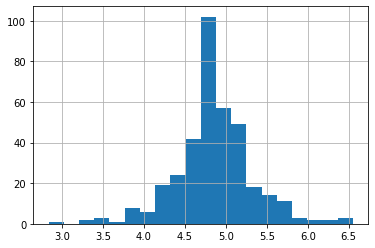

In [46]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

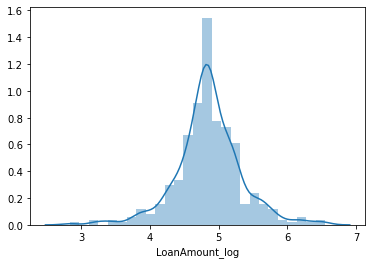

In [47]:
sns.distplot(test["LoanAmount_log"])

### Model Building

- i) Logistic Regression

- ii) Decision Tree

- iii) Random Forest

- iv) Random Forest with Grid Search

- v) XGBClassifier

In [48]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [52]:
X=train.drop("Loan_Status",1)

In [54]:
y=train[["Loan_Status"]]

In [56]:
X = pd.get_dummies(X)

In [57]:
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [58]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [59]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [60]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.852030,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.787492,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
logistic_model = LogisticRegression(random_state=1)

In [65]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s predict the Loan_Status for validation set

In [66]:
pred_cv_logistic=logistic_model.predict(x_cv)

Now calculate how accurate our predictions are by calculating the accuracy.

In [67]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [68]:
score_logistic

79.45945945945945

So our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly for our logistic regression model.

Let’s make predictions for the test dataset.

In [69]:
pred_test_logistic = logistic_model.predict(test)

In [102]:
submission_3=pd.read_csv("sample_submission.csv")

In [109]:
submission_3['Loan_Status'] = pred_test_logistic 
submission_3['Loan_ID'] = test_original['Loan_ID']

In [110]:
submission_3['Loan_Status'].replace(0, 'N',inplace=True)
submission_3['Loan_Status'].replace(1, 'Y',inplace=True)

In [111]:
pd.DataFrame(submission_3, columns=['Loan_ID','Loan_Status']).to_csv('model_1_logistic.csv')

### Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
tree_model = DecisionTreeClassifier(random_state=1)


In [114]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [115]:
pred_cv_tree=tree_model.predict(x_cv)

In [116]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

In [117]:
score_tree

72.43243243243244

In [75]:
pred_test_tree = tree_model.predict(test)

In [118]:
submission_3['Loan_Status'] = pred_test_tree 
submission_3['Loan_ID'] = test_original['Loan_ID']

In [119]:
submission_3['Loan_Status'].replace(0, 'N',inplace=True)
submission_3['Loan_Status'].replace(1, 'Y',inplace=True)

In [120]:
pd.DataFrame(submission_3, columns=['Loan_ID','Loan_Status']).to_csv('model_2_tree.csv')

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [79]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [80]:
pred_cv_forest=forest_model.predict(x_cv)

In [81]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [82]:
score_forest

78.37837837837837

In [83]:
pred_test_forest=forest_model.predict(test)

In [121]:
submission_3['Loan_Status'] = pred_test_forest 
submission_3['Loan_ID'] = test_original['Loan_ID']

In [122]:
submission_3['Loan_Status'].replace(0, 'N',inplace=True)
submission_3['Loan_Status'].replace(1, 'Y',inplace=True)

In [127]:
pd.DataFrame(submission_3, columns=['Loan_ID','Loan_Status']).to_csv('model_3_rf.csv')

### Random Forest with Grid-search

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [86]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [87]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [88]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [89]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)

In [90]:
grid_forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [91]:
pred_grid_forest = grid_forest_model.predict(x_cv)

In [92]:
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100

In [93]:
score_grid_forest

78.91891891891892

our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly for our Random Forest model with grid search.

In [94]:
pred_grid_forest_test = grid_forest_model.predict(test)

In [128]:
submission_3['Loan_Status'] = pred_grid_forest_test 
submission_3['Loan_ID'] = test_original['Loan_ID']

In [129]:
submission_3['Loan_Status'].replace(0, 'N',inplace=True)
submission_3['Loan_Status'].replace(1, 'Y',inplace=True)

In [130]:
pd.DataFrame(submission_3, columns=['Loan_ID','Loan_Status']).to_csv('model_4_rf_grid.csv')

### XGBoost

In [95]:
from xgboost import XGBClassifier

In [96]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)

In [97]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
pred_xgb=xgb_model.predict(x_cv)

In [99]:
score_xgb = accuracy_score(pred_xgb,y_cv)*100

In [100]:
score_xgb

74.05405405405405

our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our XGBClassifier model.

Logistic Regression model gives : 79% prediction accuracy

Decision Tree model gives :   71%  prediction accuracy

Random Forest model gives : 78%  prediction accuracy

Random Forest with Grid Search model gives :  77%   prediction accuracy

XGBClassifier model gives : 78%     prediction accuracy 

In [ ]:
x=np.array(finaldDf)
ypred=dt.predict(x)
ypred
test=pd.read_csv("test_ff.csv")
test["Loan_Status"]=ypred
dict = {1: 'Y', 0: 'N'} 
test['Loan_Status']= test['Loan_Status'].map(dict) 
test=test.drop(['Gender', 'Married'],axis=1)
test.to_csv("decisionTree.csv")